## IMPORTS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
import cv2
from pca import PCA

# SUBTASK 1

## Load and plot original data

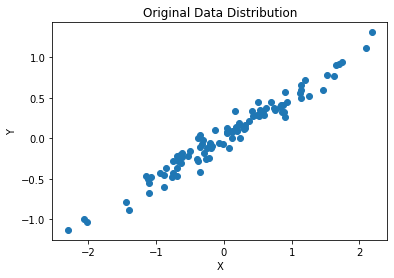

In [2]:
# load data
data = np.loadtxt('pca_dataset.txt')
# print(data.shape)
X, Y = data.T
# plot original data
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original Data Distribution')
plt.plot(X, Y, 'o')
plt.savefig('Original_data.pdf')

## Plot centered data

Data Mean value: [0.060582852075698704, 0.04557090379986921]


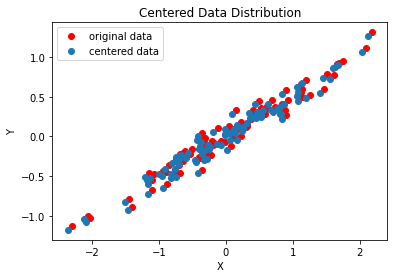

In [3]:
mean_d1, mean_d2 = data.mean(0)
print('Data Mean value:', [mean_d1, mean_d2])

# calculate centered data
centered_data = data - [mean_d1, mean_d2]
# plot new centered data with original alongside
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Centered Data Distribution')
plt.plot(data[:, 0], data[:, 1], 'o', c='red', label="original data")
plt.plot(centered_data[:, 0], centered_data[:, 1], 'o', label="centered data")
plt.legend()
plt.savefig('Centered_Data_Distribution.pdf')
plt.show()

## Compute eigenvectors(SVD) and eigenvalues

In [4]:
u, s, v_T = np.linalg.svd(centered_data)
# print(u, s, v_T)
# calculate covariance matrix
cov_matrix = np.cov(centered_data.T)
# eigenvectors of covariance matrix determine Principal Components
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print('Eigenvalues:',eigenvalues)
print('Eigenvectors:',v_T.T)


Eigenvalues: [0.00689572 0.99870002]
Eigenvectors: [[-0.88938337  0.45716213]
 [-0.45716213 -0.88938337]]


## Plot Principal Components

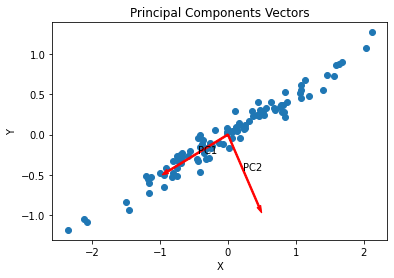

In [5]:
# plot principal component vectors with centered data
plt.title('Principal Components Vectors')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(centered_data[:, 0], centered_data[:, 1], 'o', zorder=1)
plt.arrow(0, 0, v_T.T[0, 0], v_T.T[1, 0], width=0.02, color='red', zorder=2)
plt.text(v_T.T[0, 0]/2, v_T.T[1, 0]/2, 'PC1')
plt.arrow(0, 0, v_T.T[0, 1], v_T.T[1, 1], width=0.02, color='red',zorder=2)
plt.text(v_T.T[0, 1]/2, v_T.T[1, 1]/2, 'PC2')
plt.savefig('Principal_Components.pdf')

## Plot data after projecting to Principal Components(PCA)

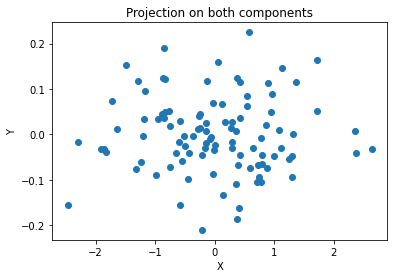

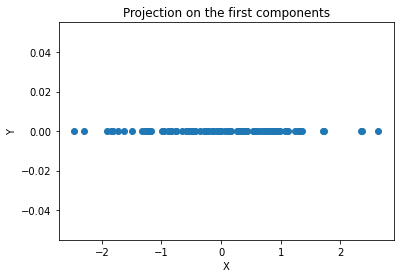

Energy conversion while projecting on PC1:  0.9931426561434291


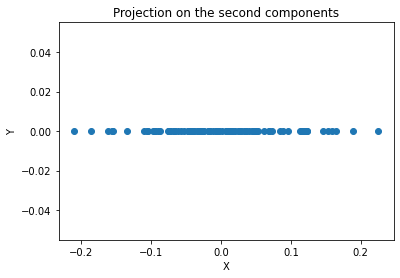

Energy conversion while projecting on PC2:  0.006857343856570884


In [6]:
# plot projection on both principal components
X_new = centered_data.dot(v_T.T)
plt.title('Projection on both components')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X_new[:, 0], X_new[:, 1], 'o')
plt.savefig('Projection_on_both_components.pdf')
plt.show()
# projection on the first principal compoenent
X_PC1 = centered_data.dot(v_T.T[:, 0])
plt.title('Projection on the first components')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X_PC1, np.zeros(len(X_PC1)), 'o')
plt.savefig('Projection_on_PC1.pdf')
plt.show()
energy_conversion_PC1 = np.square(s[0])/np.square(s).sum()
print('Energy conversion while projecting on PC1: ', energy_conversion_PC1)

# projection on the second principal component
X_PC2 = centered_data.dot(v_T.T[:, 1])
plt.title('Projection on the second components')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X_PC2, np.zeros(len(X_PC2)) , 'o')
plt.savefig('Projection_on_PC2.pdf')
plt.show()
energy_conversion_PC2 = np.square(s[1])/np.square(s).sum()
print('Energy conversion while projecting on PC2: ', energy_conversion_PC2)

# SUBTASK 2

## Generate original and resized image

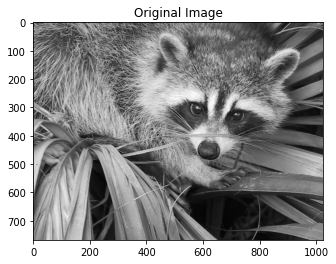

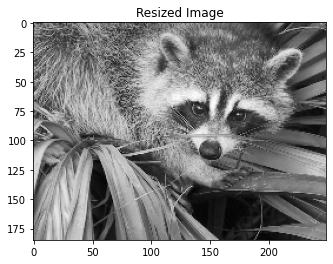

In [7]:
# generate image
image = scipy.misc.face(gray=True)
# plot original image
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.savefig('Original_image.pdf')
plt.show()
# resize original image
resized_image = cv2.resize(image, dsize=(249, 185), interpolation=cv2.INTER_CUBIC)
# plot resized image
plt.title('Resized Image')
plt.imshow(resized_image, cmap='gray')
plt.savefig('Resized_image.pdf')
plt.show()

## Perform PCA on Image

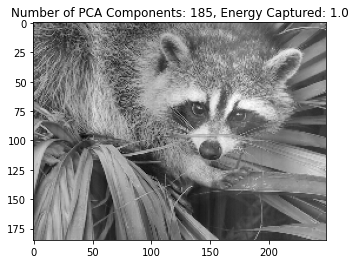

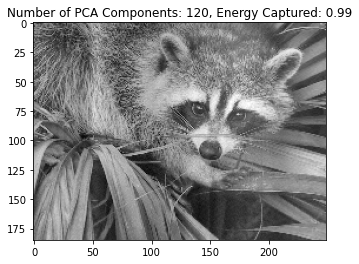

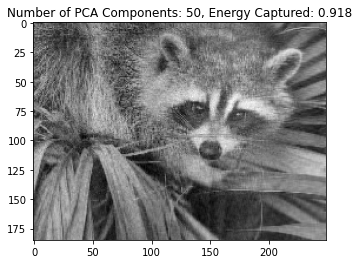

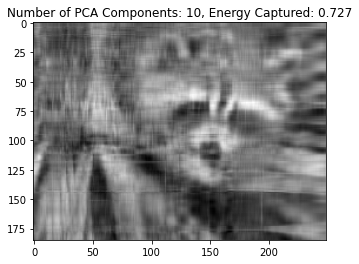

In [8]:
# center data
resized_image = resized_image - np.mean(resized_image, axis=0)
# intialize PCA class
pca = PCA(resized_image)
# initialize number of principal comoponents to which it should be projected
principal_components_values = [185, 120, 50, 10]
energies_conserved = []
real_s_for_PCA = []
# perform PCA
for num_of_PCA in principal_components_values:
    E, S = pca.perform_PCA(num_of_PCA)
    energies_conserved.append(E)
    real_s_for_PCA.append(S)
# plot projections
pca.plot_projected_image_PCs(principal_components_values, real_s_for_PCA, energies_conserved)

# SUBTASK 3

## Load trajectory data and plot first two pedestrians

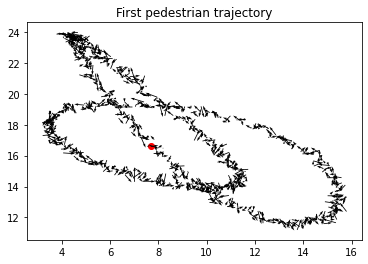

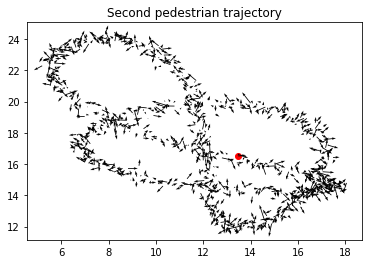

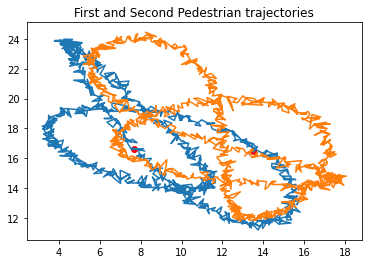

In [9]:
# load trajectories
trajectory_data = np.loadtxt('data_DMAP_PCA_vadere.txt')
# initialize trajectory matrix with zeros
X_of_pedestrians = np.zeros((15, 1000))
Y_of_pedestrians = np.zeros((15, 1000))
# save trajectory coordinates of each pedestrian
for i in range(15):
    X_of_pedestrians[i] = trajectory_data[:, 2*i]
    Y_of_pedestrians[i] = trajectory_data[:, 2*i + 1]

x_directions = np.zeros(1000)
y_directions = np.zeros(1000)
# calculate trajectory directions
for i in range(999):
    x_directions[i] = X_of_pedestrians[0][i+1] - X_of_pedestrians[0][i]
    y_directions[i] = Y_of_pedestrians[0][i+1] - Y_of_pedestrians[0][i]

# plot starting point and movement of first pedestrian
plt.scatter(X_of_pedestrians[0][0],Y_of_pedestrians[0][0], marker="o", c='red')
plt.quiver(X_of_pedestrians[0], Y_of_pedestrians[0], x_directions, y_directions)
plt.title('First pedestrian trajectory')
plt.savefig('First_pedestrian_trajectory.pdf')
plt.show()
# plot starting point and movement of second pedestrian
plt.scatter(X_of_pedestrians[1][0],Y_of_pedestrians[1][0], marker="o", c='red')
plt.quiver(X_of_pedestrians[1], Y_of_pedestrians[1], x_directions, y_directions)
plt.title('Second pedestrian trajectory')
plt.savefig('Second_pedestrian_trajectory.pdf')
plt.show()
# plot first and second pedestrian trajectories
plt.scatter(X_of_pedestrians[0][0],Y_of_pedestrians[0][0], marker="o", c='red')
plt.plot(X_of_pedestrians[0], Y_of_pedestrians[0])
plt.scatter(X_of_pedestrians[1][0],Y_of_pedestrians[1][0], marker="o", c='red')
plt.plot(X_of_pedestrians[1], Y_of_pedestrians[1])
plt.title('First and Second Pedestrian trajectories')
plt.savefig('First_and_second_trajectories.pdf')
plt.show()

## Performing PCA on the pedestrians trajectories

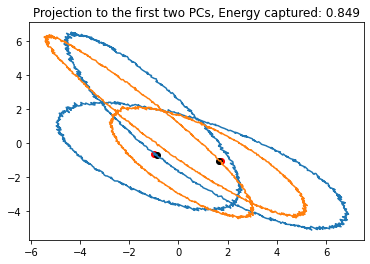

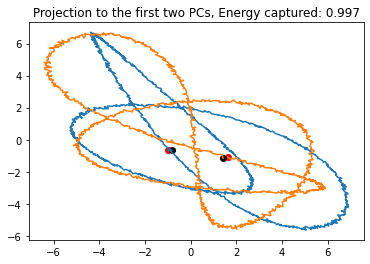

In [10]:
# center data
centered_trajectory_data = trajectory_data - np.mean(trajectory_data, axis=0)
# initialize PCA class
pca = PCA(centered_trajectory_data)
# initialize number of principal comoponents to which it should be projected
principal_components_values = [2, 3]
energies_conserved = []
real_s_for_PCA = []
# perform PCA
for num_of_PCA in principal_components_values:
    E, S = pca.perform_PCA(num_of_PCA)
    energies_conserved.append(E)
    real_s_for_PCA.append(S)
# plot projected trajectories
pca.plot_projected_path_PCs(principal_components_values, real_s_for_PCA, energies_conserved)